In [1]:
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

Discretization and Boundary conditions (Explicit method)

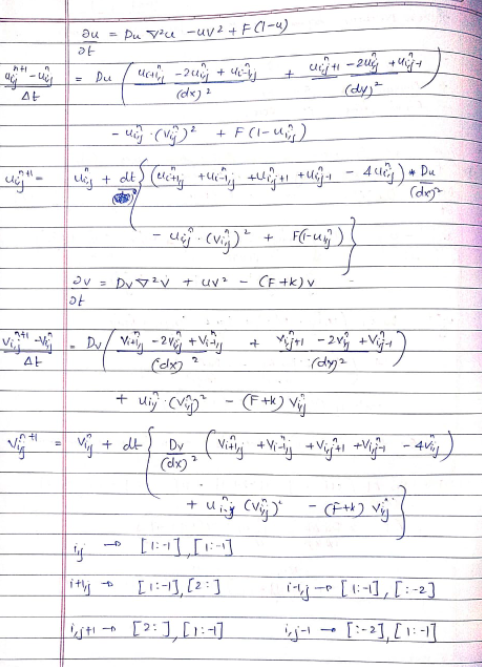

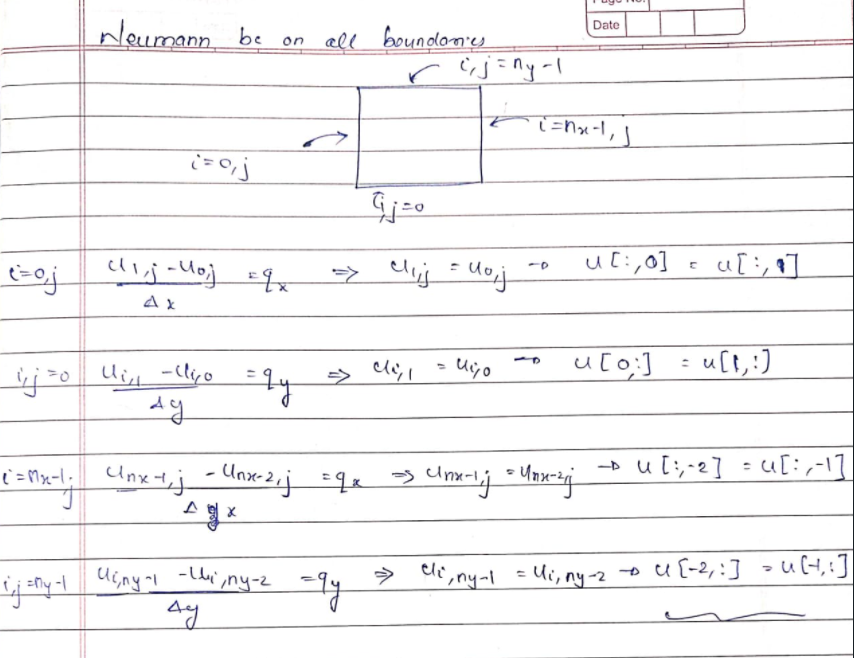

Creating a ftcs scheme based function for integrating in time. 
In our case, qx=qy=0. 

*Note*: inside the for loop, the lines un = u.copy() and vn = v.copy() update the temporary un and vn arrays with the latest values for each iteration. These lines are necessary or else, it leads to a wrong answer (although a seemingly accurate animation of the result). 


*Note*: also, while entering the boundary condition, the value of the boundary needs to be updated, hence the RHS and LHS of u[:, 0] = u[:, 1], u[:, -1] = u[:, -2] and so on should be followed. 

In [2]:
def ftcs_rxn_dfn(u, v, dx, dy, dt, nt, Du, Dv, F, k):
    u = u0.copy()
    v = v0.copy()
    u_hist = [u0]
    v_hist = [v0]

    for n in range(1,nt):
        un = u.copy()
        vn = v.copy()
        u[1:-1, 1:-1] = un[1:-1, 1:-1] + dt*(Du*((un[1:-1, 2:] - 2*un[1:-1, 1:-1] + un[1:-1, :-2])/(dx**2) + (un[2:,1:-1] - 2*un[1:-1, 1:-1] + un[:-2, 1:-1])/(dy**2)) - un[1:-1, 1:-1]*(vn[1:-1, 1:-1]**2) + F*(1 - un[1:-1, 1:-1]))
        v[1:-1, 1:-1] = vn[1:-1, 1:-1] + dt*(Dv*((vn[1:-1, 2:] - 2*vn[1:-1, 1:-1] + vn[1:-1, :-2])/(dx**2) + (vn[2:,1:-1] - 2*vn[1:-1, 1:-1] + vn[:-2, 1:-1])/(dy**2)) + un[1:-1, 1:-1]*(vn[1:-1, 1:-1]**2) - vn[1:-1, 1:-1]*(F + k))
        #Neumann boundary condition on all boundaries
        #for left boundary
        u[:, 0] = u[:, 1]
        v[:, 0] = v[:, 1]
        #for bottom boundary
        u[0, :] = u[1, :]
        v[0, :] = v[1, :]
        #for right boundary
        u[:, -1] = u[:, -2]
        v[:, -1] = v[:, -2]
        #for top boundary
        u[-1, :] = u[-2, :]
        v[-1, :] = v[-2, :]
        #storing values for all time steps
        u_hist.append(u.copy())
        v_hist.append(v.copy())
    return u_hist, v_hist

In [3]:
# Set spatial parameters.
Lx, Ly = 5.0, 5.0  # domain dimensions
nx, ny = 192, 192  # number of points in each direction
dx, dy = Lx / (nx - 1), Ly / (ny - 1)  # grid spacings

# Set parameters of the pattern.
Du, Dv = 0.00016, 0.00008  # rates of diffusion
F, k = 0.035, 0.065  # parameters to feed and kill

# Set temporal parameters.
t = 8000.0  # final time
dt = 9.0 * dx**2 / (40.0 * max(Du, Dv))  # time-step size
nt = int(t / dt)  # number of time steps to compute

In [4]:
print(dt, nt)

0.963686576574107 8301


In [5]:
import urllib.request

# Download and read the data file.
url = ('https://github.com/numerical-mooc/numerical-mooc/blob/master/'
       'lessons/04_spreadout/data/uvinitial.npz?raw=true')
filepath = 'uvinitial.npz'
urllib.request.urlretrieve(url, filepath);

In [6]:
# Read the initial fields from the file.
uvinitial = numpy.load(filepath)
u0, v0 = uvinitial['U'], uvinitial['V']

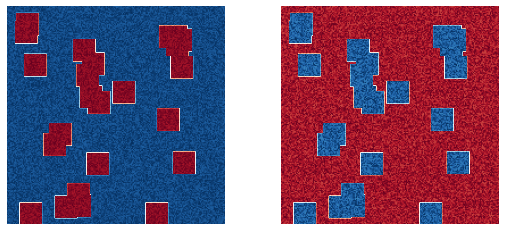

In [7]:
# Plot the initial fields.
fig, ax = pyplot.subplots(ncols=2, figsize=(9.0, 4.0))
ax[0].imshow(u0, cmap=cm.RdBu)
ax[0].axis('off')
ax[1].imshow(v0, cmap=cm.RdBu)
ax[1].axis('off');

In [8]:
U_op = ftcs_rxn_dfn(u0, v0, dx, dy, dt, nt, Du, Dv, F, k)[0]
V_op = ftcs_rxn_dfn(u0, v0, dx, dy, dt, nt, Du, Dv, F, k)[1]


Answer of the assignment

In [9]:
U_op[-1][100,::40]

array([0.92468763, 0.85016693, 0.66816509, 0.90198113, 0.90395252])

(-0.5, 191.5, 191.5, -0.5)

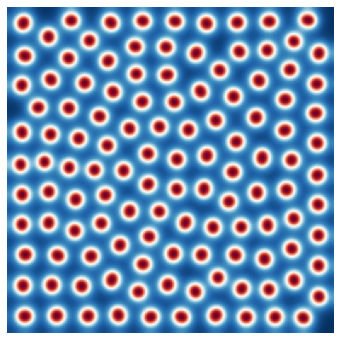

In [10]:
fig, ax = pyplot.subplots(ncols=1, figsize=(10.0, 6.0))
ax.imshow(U_op[-1], cmap=cm.RdBu)
ax.axis('off')
#ax[1].imshow(V_op[100], cmap=cm.RdBu)
#ax[1].axis('off');

To animate the results, here I have used the Camera function from the celluloid module. A quick overview of different animation methods using matplotlib can be found here: 
https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

In [11]:
from celluloid import Camera
from IPython.display import HTML

In [12]:
camera = Camera(fig)
for i in range(0, nt, 100):
    ax.imshow(U_op[i], cmap=cm.RdBu)
    ax.axis('off')
    camera.snap()
animation = camera.animate(interval = 50, repeat = True)
HTML(animation.to_html5_video())


Some more fun with different patterns

In [13]:
Du1, Dv1, F1, k1 = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish

In [14]:
U_op1 = ftcs_rxn_dfn(u0, v0, dx, dy, dt, nt, Du1, Dv1, F1, k1)[0]
V_op1 = ftcs_rxn_dfn(u0, v0, dx, dy, dt, nt, Du1, Dv1, F1, k1)[1]

In [15]:
camera = Camera(fig)
for i in range(0, nt, 100):
    ax.imshow(U_op1[i], cmap=cm.RdBu)
    ax.axis('off')
    camera.snap()
animation = camera.animate(interval = 50, repeat = True)
HTML(animation.to_html5_video())

In [16]:
Du3, Dv3, F3, k3 = 0.00012, 0.00008, 0.020, 0.050 # Spirals Dense
U_op3 = ftcs_rxn_dfn(u0, v0, dx, dy, dt, nt, Du3, Dv3, F3, k3)[0]
V_op3 = ftcs_rxn_dfn(u0, v0, dx, dy, dt, nt, Du3, Dv3, F3, k3)[1]


In [17]:
camera = Camera(fig)
for i in range(0, nt, 100):
    ax.imshow(V_op3[i], cmap=cm.RdBu)
    ax.axis('off')
    camera.snap()
animation = camera.animate(interval = 100, repeat = True)
HTML(animation.to_html5_video())

In [18]:
Du4, Dv4, F4, k4 = 0.00016, 0.00008, 0.060, 0.062 # Coral
U_op4 = ftcs_rxn_dfn(u0, v0, dx, dy, dt, nt, Du4, Dv4, F4, k4)[0]
V_op4 = ftcs_rxn_dfn(u0, v0, dx, dy, dt, nt, Du4, Dv4, F4, k4)[1]

In [19]:
camera = Camera(fig)
for i in range(0, nt, 100):
    ax.imshow(U_op4[i], cmap=cm.RdBu)
    ax.axis('off')
    camera.snap()
animation = camera.animate(interval = 100, repeat = True)
HTML(animation.to_html5_video())

By changing the F and k values, we can create more variations in the patterns, like providing some directionality or pattern. Refer Karl Sims' article for more understanding. Below is a simple trial by varying values of k across the spatial grid. 

In [20]:
k_var = numpy.ones_like(u0)*0.062
k_var[:, ::40] = 0.050
k_var[::50, :] = 0.020
print(k_var)

[[0.02  0.02  0.02  ... 0.02  0.02  0.02 ]
 [0.05  0.062 0.062 ... 0.062 0.062 0.062]
 [0.05  0.062 0.062 ... 0.062 0.062 0.062]
 ...
 [0.05  0.062 0.062 ... 0.062 0.062 0.062]
 [0.05  0.062 0.062 ... 0.062 0.062 0.062]
 [0.05  0.062 0.062 ... 0.062 0.062 0.062]]


In [21]:
def ftcs_rxn_dfn_var(u, v, dx, dy, dt, nt, Du, Dv, F, k):
    u = u0.copy()
    v = v0.copy()
    u_hist = [u0]
    v_hist = [v0]

    for n in range(1,nt):
        un = u.copy()
        vn = v.copy()
        u[1:-1, 1:-1] = un[1:-1, 1:-1] + dt*(Du*((un[1:-1, 2:] - 2*un[1:-1, 1:-1] + un[1:-1, :-2])/(dx**2) + (un[2:,1:-1] - 2*un[1:-1, 1:-1] + un[:-2, 1:-1])/(dy**2)) - un[1:-1, 1:-1]*(vn[1:-1, 1:-1]**2) + F*(1 - un[1:-1, 1:-1]))
        v[1:-1, 1:-1] = vn[1:-1, 1:-1] + dt*(Dv*((vn[1:-1, 2:] - 2*vn[1:-1, 1:-1] + vn[1:-1, :-2])/(dx**2) + (vn[2:,1:-1] - 2*vn[1:-1, 1:-1] + vn[:-2, 1:-1])/(dy**2)) + un[1:-1, 1:-1]*(vn[1:-1, 1:-1]**2) - vn[1:-1, 1:-1]*(F + k[1:-1, 1:-1]))
        #Neumann boundary condition on all boundaries
        #for left boundary
        u[:, 0] = u[:, 1]
        v[:, 0] = v[:, 1]
        #for bottom boundary
        u[0, :] = u[1, :]
        v[0, :] = v[1, :]
        #for right boundary
        u[:, -1] = u[:, -2]
        v[:, -1] = v[:, -2]
        #for top boundary
        u[-1, :] = u[-2, :]
        v[-1, :] = v[-2, :]
        #storing values for all time steps
        u_hist.append(u.copy())
        v_hist.append(v.copy())
    return u_hist, v_hist

In [22]:
Du5, Dv5, F5, k5 = 0.00016, 0.00008, 0.060, k_var # Coral
U_op5 = ftcs_rxn_dfn_var(u0, v0, dx, dy, dt, nt, Du5, Dv5, F5, k5)[0]
V_op5 = ftcs_rxn_dfn_var(u0, v0, dx, dy, dt, nt, Du5, Dv5, F5, k5)[1]

In [23]:
camera = Camera(fig)
for i in range(0, nt, 100):
    ax.imshow(U_op5[i], cmap=cm.RdBu)
    ax.axis('off')
    camera.snap()
animation = camera.animate(interval = 100, repeat = True)
HTML(animation.to_html5_video())